<a href="https://colab.research.google.com/github/parksanghan/machine_learning_Deep_learning/blob/main/image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list


Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.14.0.32.55
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [ ]:
!pip install opencv-python


In [ ]:
import cv2

In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
model = tf.saved_model.load('/content/saved_model')


In [ ]:
# options = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')

def detect_objects(images):
  input_tensor = tf.convert_to_tensor([images] , dtype=tf.uint8)
  detections = model(input_tensor)

  return detections

In [ ]:
img_path = "/content/KakaoTalk_20241021_154940431.jpg"
imge = cv2.imread(img_path)

image_rgb =  cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
detections = detect_objects(image_rgb)

In [ ]:
detections

{'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[5.39398730e-01, 1.40557796e-01, 6.57403648e-01, 2.57160157e-01],
         [3.89198065e-02, 2.23845944e-01, 9.20514822e-01, 5.25605500e-01],
         [2.82758594e-01, 7.85819888e-01, 4.05758202e-01, 9.31770325e-01],
         [4.93581355e-01, 1.18417017e-01, 6.39082491e-01, 2.46680528e-01],
         [1.88321322e-01, 7.89310187e-02, 3.58803660e-01, 1.34788811e-01],
         [1.40465394e-01, 8.64955306e-01, 6.19683564e-01, 9.99172568e-01],
         [4.73809838e-02, 5.27851701e-01, 9.75781977e-01, 7.25634813e-01],
         [1.54560119e-01, 4.58037257e-01, 6.69508815e-01, 5.83601117e-01],
         [3.20898294e-02, 1.58549771e-01, 9.13238108e-01, 4.07280207e-01],
         [9.40248072e-02, 6.90007508e-01, 9.18640494e-01, 8.48248541e-01],
         [1.19677670e-01, 8.17734122e-01, 2.53236413e-01, 8.98206711e-01],
         [1.61710501e-01, 1.31192788e-01, 2.97437847e-01, 1.85749069e-01],
         [2.81237096e-01, 7

In [ ]:
num_detections  = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections]
               for key, value in detections.items()}
detections['num_detections'] = num_detections


KeyError: 'num_detections'

In [ ]:
class_ids = detections['detection_classes'].numpy().astype(np.int64)  # NumPy 배열로 변환
scores = detections['detection_scores'].numpy()  # 점수도 NumPy 배열로 변환
threshold = 0.1

for i in range(len(scores)):
    if scores[i] > threshold:
        box = detections['detection_boxes'][i]
        ymin, xmin, ymax, xmax = box
        (left, right, top, bottom) = (
            xmin * imge.shape[1], xmax * imge.shape[1], ymin * imge.shape[0], ymax * imge.shape[0])
        cv2.rectangle(imge, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)
        cv2.putText(imge,
                    f'Class:{class_ids[i]}, Score:{scores[i]:.2f}',
                    (int(left), int(top - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


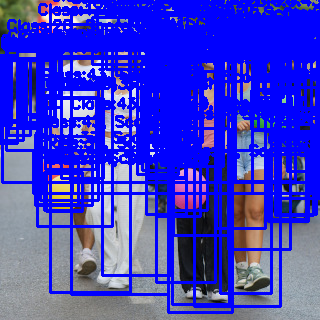

In [ ]:
from google.colab.patches import cv2_imshow
# 이미지 출력
from matplotlib import pyplot as plt
cv2_imshow(imge)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 읽기
img_path = "/content/pngtree-an-image-of-a-green-circle-over-a-black-background-image_2578003.jpg"
imge = cv2.imread(img_path)

# 객체 탐지 함수 호출 (detect_objects는 이미 정의되어 있다고 가정)
image_rgb = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
detections = detect_objects(image_rgb)

# 클래스 ID 및 점수 변환
class_ids = detections['detection_classes'].numpy().astype(np.int64)
scores = detections['detection_scores'].numpy()
threshold = 0.5

for i in range(len(scores)):
    if scores[i] > threshold:
        box = detections['detection_boxes'][i]
        ymin, xmin, ymax, xmax = box
        (left, right, top, bottom) = (
            xmin * imge.shape[1], xmax * imge.shape[1], ymin * imge.shape[0], ymax * imge.shape[0])

        # 경계 상자 그리기
        cv2.rectangle(imge, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)

        # 텍스트 추가
        cv2.putText(imge,
                    f'Class:{class_ids[i]}, Score:{scores[i]:.2f}',
                    (int(left), int(top - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# 이미지 출력
cv2_imshow(imge)
cv2.waitKey(0)
cv2.destroyAllWindows()
